In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

In [57]:
#linear demand
    
A = [[-3, -2],[-1, -3]]
B = [6,6]
#create dynamics
#vector: x1, x2, dx2, beta
#let's just use list
#!!!!I think the issue right now is with the signs!!!!
def dynamics(state, t):
    beta = .5
    state_dot = [0,0,0]
    state_dot[0] = 2*A[0][0]*state[0] + A[0][1]*(state[1] + state[2]) + B[0]
    #might need to look at sign for state[2]
    state_dot[1] = 2*A[1][1]*(state[1] + state[2] ) + A[1][0]*state[0] + B[1]
    
    #delta x dynamics - probably need to sign check so that he only shifts in the right direction
    #he know if he shifts the other way, the other guy won't be able to pay
    p1_surp = beta*state[2]*state[0]*A[0][1]
    if p1_surp < 0:
        state_dot[2] = -2*state[2]
    else:
        marginal_change_in_sidepayment = beta*A[0][1]*state[0]
        state_dot[2] = marginal_change_in_sidepayment
        marginal_change_in_profits = 2*A[1][1]*(state[1] + state[2] ) + A[1][0]*state[0] + B[1]
        #if marginal change in profits is same sign as marginal change in sidepayment, disregaurd
        #that way we're looking strictly at gains and losses due to cooperation.
        #Including it would be incorporating gains due to price shift, not cooperation
        if np.sign(marginal_change_in_sidepayment) != np.sign(marginal_change_in_profits) :
            state_dot[2] += marginal_change_in_profits
        
        
    #beta dyanmics
    #for the moment, pretend beta is fixe and lets see if we can get delta x to do what we want
    #if state[2]*A[0][1] <= 0:
        #state_dot[3] = -2*state_dot[3]
    #else:
        #dx_opt = (state[3]*A[0][1]*state[0] - A[1][0]*state[0] - 2*A[1][1]*state[1] - B[1])/(4*A[1][1])
        #state_dot[3] = A[0][1]*state[0]*dx_opt - (1-state[3])*((A[0][1]*state[0])**2)/(4*A[1][1])
    
    #state_dot[3] = 0
    
    #check bounds
    if state[0] <=0 and state_dot[0] < 0:
        state_dot[0] = 0
    if state[1] <=0 and state_dot[1] < 0:
        state_dot[1] = 0
    if (state[1] + state[2]) <= 0 and (state_dot[1] + state_dot[2]) < 0:
        state_dot[2] = 0
    if state_dot[2] == -1*state_dot[1]:
        state_dot[2] = 0
        state_dot[1] = 0
    return state_dot
    

In [60]:
x0 = [0,0,0]
#x0 = [12/17,15/17,.1,.1]
t = np.linspace(0.0, 4.0, 2000)
x = odeint(dynamics, x0, t)

In [61]:
df = pd.DataFrame(x)
df.columns = ['Price 1', 'Price 2', 'Delta Price 2']
df['Price 2 Net'] = df['Price 2'] + df['Delta Price 2']
df['p1 surplus'] = df['Delta Price 2']*df['Price 1']*A[0][1]

df['Profit 1'] = df['Price 1']*(A[0][0]*df['Price 1'] + A[0][1]*df['Price 2'] + B[0])
df['Profit 2'] = df['Price 2 Net']*(A[1][1]*df['Price 2 Net'] + A[1][0]*df['Price 1'] + B[1])
df['Total 1'] = df['Profit 1']  + (1 - .5)*df['p1 surplus']
df['Total 2'] = df['Profit 2'] + .5*df['p1 surplus']
df['Social Welfare'] = df['Profit 1'] + df['Profit 2']



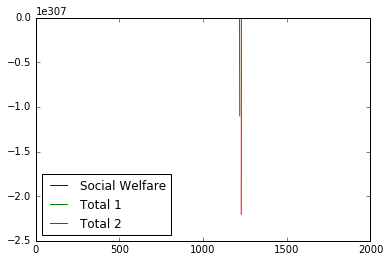

In [62]:
df[['Social Welfare', 'Total 1', 'Total 2']].plot()

(0, 0.6)

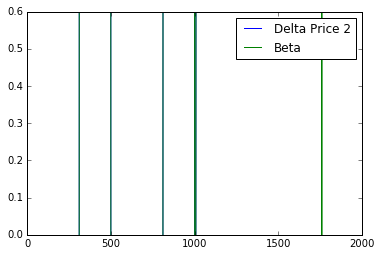

In [52]:
df[['Delta Price 2', 'Beta']].plot()
plt.ylim([0,.6])

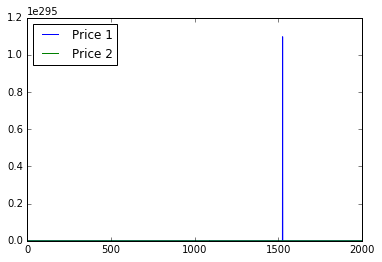

In [63]:
df[['Price 1', 'Price 2']].plot()